<a href="https://colab.research.google.com/github/Gru97/DeepLearningCourse/blob/main/dp_session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
x= np.random.rand(200,1)
e=np.random.rand(200,1)*.2
true_b=1
true_w=2
y=true_b+ true_w*x+e
y.shape


(200, 1)

In [8]:
import torch
x_tensor= torch.tensor(x)
y_tensor= torch.tensor(y)

In [9]:
print(x_tensor.device)
device='cuda' if torch.cuda.is_available else 'cpu'
print(device)
x_tensor = x_tensor.to(device)
x_tensor.device

y_tensor=y_tensor.to(device)

cpu
cuda


In [10]:
torch.manual_seed(42)
b= torch.randn(1, requires_grad=True, device= device)
w=torch.randn(1, requires_grad=True, device= device)
b,w

(tensor([0.1940], device='cuda:0', requires_grad=True),
 tensor([0.1391], device='cuda:0', requires_grad=True))

In [11]:
y_pred= b+w*x_tensor
error = y_pred-y_tensor
loss= 0.5*(error**2).mean()
loss.backward()
w.grad, b.grad

(tensor([-1.0470], device='cuda:0'), tensor([-1.8230], device='cuda:0'))

In [12]:
lr=0.5

with torch.no_grad():
  w -= lr * w.grad
  b -= b-lr * b.grad
w.grad.zero_()
b.grad.zero_()

tensor([0.], device='cuda:0')

In [13]:
loss.detach().cpu().item()


1.8024155748701771

In [95]:
!pip install torchviz
!pip install graphviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=3a51e16c71375fda1d9c8100c631ecf483ec2793e62ee25b4186b33e2d2ccf40
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


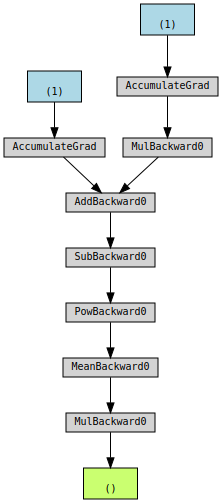

In [98]:
from torchviz import make_dot
make_dot(loss)

In [22]:
#with loop
torch.manual_seed(42)
b= torch.randn(1, requires_grad=True, device= device)
w=torch.randn(1, requires_grad=True, device= device)
b,w

losses=[]
epoch=50
for _ in range(epoch):
  y_pred= b + w* x_tensor
  error = y_pred - y_tensor
  loss = lr*(error**2).mean()
  loss.backward()

  with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad

  w.grad.zero_()
  b.grad.zero_()
  losses.append(loss.detach().cpu().item())

In [23]:
losses

[1.8024155748701771,
 0.28711703346691053,
 0.0765539408424792,
 0.04537536783940643,
 0.038981604124619415,
 0.036126185106677804,
 0.03388200330398664,
 0.03183903510449979,
 0.029933528559321524,
 0.02814978298580841,
 0.026479124725516515,
 0.02491425390528107,
 0.0234484625085668,
 0.02207547031343358,
 0.020789403683732412,
 0.01958475879160179,
 0.018456384879817864,
 0.017399449233219004,
 0.01640942886929554,
 0.015482089129960687,
 0.014613460619448425,
 0.013799826950869006,
 0.01303770397222065,
 0.01232383195018933,
 0.011655156056562737,
 0.011028814473843112,
 0.01044212840838866,
 0.009892584335918515,
 0.00937783274516845,
 0.008895671475481853,
 0.008444037218733255,
 0.008020996979898607,
 0.007624739109305717,
 0.007253568827958765,
 0.006905895750538575,
 0.0065802370748842785,
 0.0062751964221935234,
 0.0059894680929182525,
 0.005721827801993293,
 0.005471132678538384,
 0.005236309211026186,
 0.00501635269783411,
 0.004810321851799423,
 0.0046173353492618705,
 0.0

In [24]:
w, b

(tensor([1.7821], device='cuda:0', requires_grad=True),
 tensor([1.2158], device='cuda:0', requires_grad=True))

In [29]:
from torch import optim

torch.manual_seed(42)
b= torch.randn(1, requires_grad=True, device = device)
w= torch.randn(1, requires_grad=  True, device= device)
losses=[]
lr=0.5
optimizer = optim.SGD([b,w], lr=lr)

for _ in range(epoch):
  y_pred= b + w*x_tensor
  error= y_pred - y_tensor
  loss = 0.5*(error**2).mean()
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()
  losses.append(loss.detach().cpu().item())

losses, w, b

([1.8024155748701771,
  0.28711703346691053,
  0.0765539408424792,
  0.04537536783940643,
  0.038981604124619415,
  0.036126185106677804,
  0.03388200330398664,
  0.03183903510449979,
  0.029933528559321524,
  0.02814978298580841,
  0.026479124725516515,
  0.02491425390528107,
  0.0234484625085668,
  0.02207547031343358,
  0.020789403683732412,
  0.01958475879160179,
  0.018456384879817864,
  0.017399449233219004,
  0.01640942886929554,
  0.015482089129960687,
  0.014613460619448425,
  0.013799826950869006,
  0.01303770397222065,
  0.01232383195018933,
  0.011655156056562737,
  0.011028814473843112,
  0.01044212840838866,
  0.009892584335918515,
  0.00937783274516845,
  0.008895671475481853,
  0.008444037218733255,
  0.008020996979898607,
  0.007624739109305717,
  0.007253568827958765,
  0.006905895750538575,
  0.0065802370748842785,
  0.0062751964221935234,
  0.0059894680929182525,
  0.005721827801993293,
  0.005471132678538384,
  0.005236309211026186,
  0.00501635269783411,
  0.00481

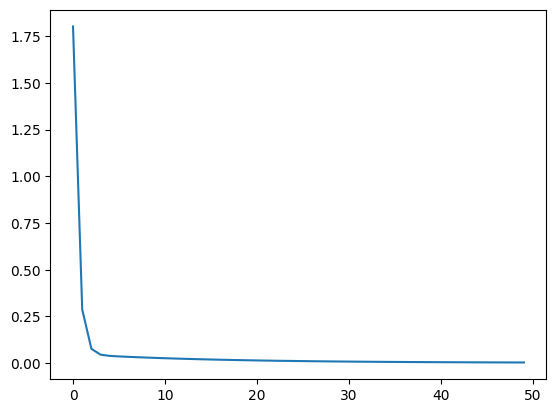

In [30]:
import matplotlib.pyplot as plt
plt.plot (range(epoch), losses)
plt.show()

In [34]:
import torch.nn as nn
loss_fn = nn.MSELoss()
loss = loss_fn(y_pred, y_tensor)

In [40]:
class ManualRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype= torch.float64))
    self.w= nn.Parameter(torch.randn(1, requires_grad=True, dtype= torch.float64))

  def forward(x):
    return self.b + self.w * x

In [ ]:
torch.manual_seed(42)
model = ManualRegression()

list(model.parameters())
model.state_dict()

In [2]:
from torch import optim

torch.manual_seed(42)

losses=[]
lr=0.5
optimizer = optim.SGD([b,w], lr=lr)
model = ManualRegression().to(device)
loss_fn= nn.MSELoss()
for _ in range(epoch):
  model.train()
  y_pred = model(x_tensor)
  loss_fn(y_pred, y_tensor)
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()
  losses.append(loss.detach().cpu().item())

losses, w, b

NameError: name 'torch' is not defined

In [4]:
class ManualRegressionWithLayers(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Linear(in_features=1, out_features=1, bias=True)

  def forward(x):
    return self.layer(x)

NameError: name 'nn' is not defined

In [ ]:
from torch import optim

torch.manual_seed(42)

losses=[]
lr=0.5
model = ManualRegressionWithLayers().to(device)
optimizer = optim.SGD(model.parameters, lr=lr)
loss_fn= nn.MSELoss()
for _ in range(epoch):
  model.train()
  y_pred = model(x_tensor)
  loss_fn(y_pred, y_tensor)
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()
  losses.append(loss.detach().cpu().item())

losses, w, b